In [1]:
#Set working directory
import os
os.chdir("F:/DS/edWisor/Project 2")
os.getcwd()

# Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from random import randrange, uniform
from scipy.stats import chi2_contingency
from ggplot import *

C:\Users\sir\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
from fancyimpute import KNN

C:\Users\sir\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import datetime as dt

In [5]:
#Load the data
data = pd.read_csv("day.csv")

# Data exploration

In [6]:
data.shape

(731, 16)

In [7]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
#Missing Value Analysis
#Check for missing value
data.isnull().sum()
#No missing values in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#remove "instant" variable as it is just like serial number & doesn't predict
data = data.drop(['instant'], axis=1)

In [12]:
data.shape

(731, 15)

In [13]:
#extracting day number from 'dteday' variable
data['dteday'].apply(str)
data['dteday'] = pd.to_datetime(data['dteday'])
data['dteday'] = pd.DatetimeIndex(data['dteday']).day
#removing 'dteday' variable

In [14]:
data.head(20)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [15]:
#save numeric & categorical names
numnames = ["dteday","temp","atemp","hum","windspeed","casual","registered","cnt"]
catnames = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
data.shape

(731, 15)

In [16]:
for i in catnames:
    data[i] = data[i].astype('object')
for i in numnames:
    data[i] = data[i].astype('float')

In [17]:
data.dtypes

dteday        float64
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

# Outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2840629b9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x284062b12b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2840629b860>],
 'medians': [<matplotlib.lines.Line2D at 0x284062b1b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x284062b1f28>],
 'means': []}

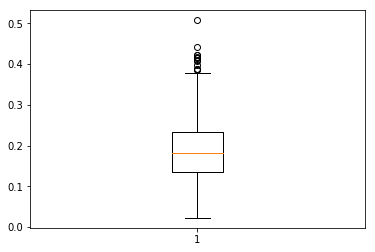

In [18]:
#Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(data['windspeed'])

In [19]:
#Detect and delete outliers from data
for i in numnames:
     print(i)
     q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)
        
     #Remove the outliers
     data = data.drop(data[data.loc[:,i] < min].index)
     data = data.drop(data[data.loc[:,i] > max].index)
        
     #data.loc[data[i] < min,:i] = np.nan
     #data.loc[data[i] > max,:i] = np.nan
     
#Calculate missing value
#missing_val = pd.DataFrame(data.isnull().sum())
#Impute with KNN
#data = pd.DataFrame(KNN(21).fit_transform(data), columns = data.columns)
     

dteday
-14.5
45.5
temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
casual
-885.0
2323.0
registered
-840.0
8018.0
cnt
-788.125
9500.875


In [20]:
data.shape              #55 rows deleted

(676, 15)

In [21]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Feature Selection

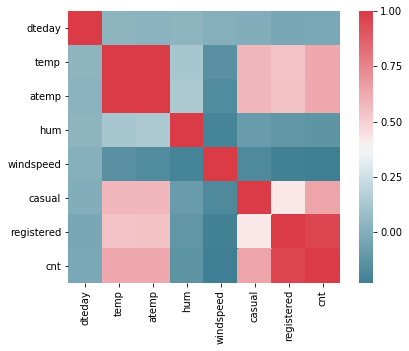

In [22]:
##Correlation analysis
#Correlation plot
df_corr = data.loc[:,numnames]
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
#Chisquare test of independence
#loop for chi square values
for i in catnames:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['cnt'], data[i]))
    print(p)

season
0.5306886312713439
yr
0.41642366315035007
mnth
0.4756091821561145
holiday
0.7870836122582522
weekday
0.43936502670720573
workingday
0.504633411642988
weathersit
0.5464467453059881


In [24]:
#New Categorical Variable containing the data of "workingday" & "holiday"
#Denote: 1-->weekend, 2--> working day, 3--> holiday
data.loc[(data['workingday'] == 0) & (data['holiday'] == 0), 'day'] = '1'
data.loc[(data['workingday'] == 1) & (data['holiday'] == 0), 'day'] = '2'
data.loc[(data['workingday'] == 0) & (data['holiday'] == 1), 'day'] = '3'

In [25]:
data = data.drop(["workingday","holiday","temp","casual","registered"], axis=1)

In [26]:
data.head(10)

,dteday,season,yr,mnth,weekday,weathersit,atemp,hum,windspeed,cnt,day
0,1.0,1,0,1,6,2,0.363625,0.805833,0.160446,985.0,1
1,2.0,1,0,1,0,2,0.353739,0.696087,0.248539,801.0,1
2,3.0,1,0,1,1,1,0.189405,0.437273,0.248309,1349.0,2
3,4.0,1,0,1,2,1,0.212122,0.590435,0.160296,1562.0,2
4,5.0,1,0,1,3,1,0.229270,0.436957,0.186900,1600.0,2
5,6.0,1,0,1,4,1,0.233209,0.518261,0.089565,1606.0,2
6,7.0,1,0,1,5,2,0.208839,0.498696,0.168726,1510.0,2
7,8.0,1,0,1,6,2,0.162254,0.535833,0.266804,959.0,1
8,9.0,1,0,1,0,1,0.116175,0.434167,0.361950,822.0,1
9,10.0,1,0,1,1,1,0.150888,0.482917,0.223267,1321.0,2


In [27]:
df = data[['dteday','mnth','yr','season','weekday','day','weathersit','atemp','hum','windspeed','cnt']]

In [28]:
df.head(10)

,dteday,mnth,yr,season,weekday,day,weathersit,atemp,hum,windspeed,cnt
0,1.0,1,0,1,6,1,2,0.363625,0.805833,0.160446,985.0
1,2.0,1,0,1,0,1,2,0.353739,0.696087,0.248539,801.0
2,3.0,1,0,1,1,2,1,0.189405,0.437273,0.248309,1349.0
3,4.0,1,0,1,2,2,1,0.212122,0.590435,0.160296,1562.0
4,5.0,1,0,1,3,2,1,0.229270,0.436957,0.186900,1600.0
5,6.0,1,0,1,4,2,1,0.233209,0.518261,0.089565,1606.0
6,7.0,1,0,1,5,2,2,0.208839,0.498696,0.168726,1510.0
7,8.0,1,0,1,6,1,2,0.162254,0.535833,0.266804,959.0
8,9.0,1,0,1,0,1,1,0.116175,0.434167,0.361950,822.0
9,10.0,1,0,1,1,2,1,0.150888,0.482917,0.223267,1321.0


In [29]:
################################Feature Scaling##################################
#All continuous variables are already normalised in this data set.


numnames = ["dteday","atemp","hum","windspeed"]         #not including "cnt" target variable
catnames = ["mnth","yr","season","weekday","day","weathersit"]

# Model Development

In [30]:
#Data Sampling
nrow= len(df.index)
train, test = train_test_split(df, test_size = 0.2)

In [31]:
train.shape     #540 x 11
test.shape      #136 x 11

(136, 11)

In [32]:
#####Decision Tree Algortithm
from sklearn.tree import DecisionTreeRegressor
fit_dt= DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:10],train.iloc[:,10])

In [33]:
fit_dt

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
predict_dt= fit_dt.predict(test.iloc[:,0:10])

In [35]:
#Calculate RMSE
def RMSE(actual, pred):
    return np.sqrt(((pred - actual) ** 2).mean())

RMSE(test.iloc[:,10],predict_dt)
#output = 1162.84440171958

1188.535712745433

In [36]:
######Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
fit_rf = RandomForestRegressor(n_estimators = 100, random_state = 99).fit(train.iloc[:,0:10],train.iloc[:,10])

In [37]:
fit_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

In [38]:
predict_rf= fit_rf.predict(test.iloc[:,0:10])

In [39]:
RMSE(test.iloc[:,10],predict_rf)
#output = 765.0407919968172

664.6875343740137

In [40]:
######Multiple Linear Regression
import statsmodels.api as sm
#Creat dataframe with all numerical variables
df.lr = df[['cnt','dteday','atemp','hum','windspeed']]
#create dummies for categorical variables
for i in catnames:
    temp = pd.get_dummies(df[i],prefix = i)
    df.lr = df.lr.join(temp)

C:\Users\sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [41]:
df.lr.shape                      #676 x 36

(676, 36)

In [42]:
#split data into train-test sets
s = np.random.rand(len(df.lr))<0.8
train.lr = df.lr[s]        #80%
test.lr = df.lr[~s]        #20%

C:\Users\sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [43]:
train.lr.shape             #564 x 36
test.lr.shape              #112 x 36

(129, 36)

In [44]:
#Build MLR model
fit_lr = sm.OLS(train.lr.iloc[:,0],train.lr.iloc[:,1:35]).fit()
fit_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 11 Feb 2019   Prob (F-statistic):          9.13e-209
Time:                        16:35:10   Log-Likelihood:                -4341.9
No. Observations:                 547   AIC:                             8742.
Df Residuals:                     518   BIC:                             8867.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
dteday          -6.5680      3.376     -1.946      0.052     -13.200       0.064
atemp         4450.6666    459.568      9.684      0.000    3547.821    5353.512
hum          -1443.6525    329.571     -4.380      0.000   -2091.112    -796.193
windspeed    -2211.6802    465.984     -4.746      0.000   -3127.130   -1296.230
mnth_1        -271.2616    173.889     -1.560      0.119    -612.877      70.354
mnth_2        -152.8416    164.715     -0.928      0.354    -476.433     170.750
mnth_3         171.9101    133.453      1.288      0.198     -90.266     434.086
mnth_4         232.7914    172.492      1.350      0.178    -106.078     571.661
mnth_5         560.6491    176.241      3.181      0.002     214.414     906.885
mnth_6         377.7945    168.944      2.236      0.026      45.895     709.694
mnth_7        -267.6623    198.963     -1.345      0.179    -658.536     123.211
mnth_8         382.1696    180.445      2.118      0.035      27.675     736.664
mnth_9         688.4831    146.879      4.687      0.000     399.931     977.035
mnth_10        332.7097    160.141      2.078      0.038      18.103     647.316
mnth_11       -311.3688    165.468     -1.882      0.060    -636.440      13.703
mnth_12       -333.4669    140.963     -2.366      0.018    -610.396     -56.538
yr_0          -260.4931    157.954     -1.649      0.100    -570.802      49.816
yr_1          1670.3994    158.038     10.570      0.000    1359.926    1980.873
season_1      -464.7154    143.929     -3.229      0.001    -747.472    -181.959
season_2       383.5092    146.700      2.614      0.009      95.310     671.709
season_3       432.9368    153.217      2.826      0.005     131.934     733.940
season_4      1058.1757    147.201      7.189      0.000     768.991    1347.361
weekday_0      123.4766     84.546      1.460      0.145     -42.618     289.571
weekday_1       20.9146     81.393      0.257      0.797    -138.986     180.815
weekday_2      162.9402     84.521      1.928      0.054      -3.105     328.985
weekday_3      189.3927     81.714      2.318      0.021      28.861     349.925
weekday_4      223.4470     82.268      2.716      0.007      61.827     385.067
weekday_5      267.0144     83.248      3.207      0.001     103.470     430.559
weekday_6      422.7208     78.022      5.418      0.000     269.443     575.999
day_1          546.1975    104.263      5.239      0.000     341.368     751.027
day_2          877.1356    118.065      7.429      0.000     645.191    1109.080
day_3          -13.4267    170.389     -0.079      0.937    -348.164     321.311
weathersit_1  1882.3447    215.215      8.746      0.000    1459.543    2305.146
weathersit_2  1392.4324    195.080      7.138      0.000    1009.188    1775.677
==============================================================================
Omnibus

In [45]:
predict_lr = fit_lr.predict(test.lr.iloc[:,1:35])

In [46]:
RMSE(test.lr.iloc[:,0],predict_lr)
#output = 713.1957640471251

861.1314023727305

In [47]:
######KNN Implementation
from sklearn import neighbors
rmse_val = []           #to store rmse values for different k
for K in range(30):
    K = K+1
    fit_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    fit_knn.fit(train.iloc[:,0:10], train.iloc[:,10]) #fit the model
    
    predict_knn = fit_knn.predict(test.iloc[:,0:10]) #make prediction on test set
    error = RMSE(test.iloc[:,10] , predict_knn) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1243.2590207382607
RMSE value for k=  2 is: 1237.8740009707822
RMSE value for k=  3 is: 1278.4816921221454
RMSE value for k=  4 is: 1371.7838612028563
RMSE value for k=  5 is: 1404.2619803340701
RMSE value for k=  6 is: 1422.5051805762746
RMSE value for k=  7 is: 1461.7565322802102
RMSE value for k=  8 is: 1491.878606425383
RMSE value for k=  9 is: 1521.837598466893
RMSE value for k=  10 is: 1498.6184858895876
RMSE value for k=  11 is: 1479.238071850984
RMSE value for k=  12 is: 1456.8790357879066
RMSE value for k=  13 is: 1460.4756020579068
RMSE value for k=  14 is: 1454.203642335162
RMSE value for k=  15 is: 1437.5991324499735
RMSE value for k=  16 is: 1426.5508530506768
RMSE value for k=  17 is: 1417.034237214192
RMSE value for k=  18 is: 1419.3269441377781
RMSE value for k=  19 is: 1418.6243006689936
RMSE value for k=  20 is: 1413.490754426524
RMSE value for k=  21 is: 1421.1544373937581
RMSE value for k=  22 is: 1417.8045789660482
RMSE value for k=  23 is:

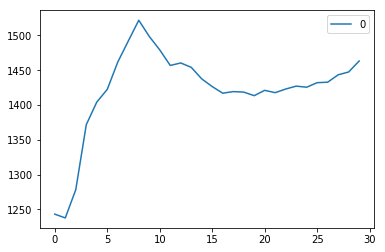

In [48]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  
curve.plot()
#K=2 is the value of neighbors for least RMSE.

In [49]:
#For K=12:
fit_knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
fit_knn.fit(train.iloc[:,0:10], train.iloc[:,10]) #fit the model
predict_knn = fit_knn.predict(test.iloc[:,0:10]) #make prediction on test set
RMSE(test.iloc[:,10] , predict_knn) 
#output = 1209.595772142617

1237.8740009707822

In [50]:
#Thus, we find the "Multiple Linear Regression Algorithm" gives us the best result with the least RMSE for this dataset.